<a href="https://colab.research.google.com/github/hernanmorales-navarrete/DataAnalysisWithPython/blob/main/Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Python


- This interactive Jupyter Notebook provides an introduction on Python packages for data analysis. This notebook incorporates real examples and exercises to engage students and enhance their understanding of data importation, transformation, exploratory analysis, regression, clustering, feature selection, dimensionality reduction, and supervised classification.

## 1. Importing Modules & Packages

In [ ]:
# Libraries for data manipulation and analysis
import numpy as np                # NumPy: for numerical operations on arrays and matrices
import pandas as pd               # Pandas: data manipulation and analysis library

# Libraries for data visualization and plotting
import matplotlib.pyplot as plt   # Matplotlib: primary library for data visualization
import seaborn as sns             # Seaborn: statistical data visualization, built on top of matplotlib

# Libraries for machine learning model selection and metrics
from sklearn.model_selection import train_test_split  # Train-test split for splitting data into training and test sets
from sklearn.linear_model import LinearRegression     # Linear regression model for regression tasks
from sklearn.linear_model import LogisticRegression   # Logistic regression model for classification tasks
from sklearn.metrics import accuracy_score            # Accuracy score metric for classification evaluation
from sklearn.metrics import mean_squared_error        # Mean squared error metric for regression evaluation
from sklearn.metrics import confusion_matrix          # Confusion matrix for classification evaluation

# Libraries for clustering, dimensionality reduction, and data preprocessing
from sklearn.cluster import KMeans                    # KMeans: for unsupervised clustering tasks
from sklearn.decomposition import PCA                 # PCA: for dimensionality reduction
from sklearn.preprocessing import StandardScaler      # StandardScaler: for standardizing features by removing the mean and scaling to unit variance

# Libraries for accessing datasets
from sklearn.datasets import load_iris               # Iris dataset: a sample dataset commonly used for machine learning tasks

In [ ]:
# Set matplotlib backend
%matplotlib inline
#%matplotlib inline              # Displays as static figure in code cell output
#%matplotlib notebook            # Displays as interactive figure in code cell output
#%matplotlib qt                  # Displays as interactive figure in a separate window

sns.set(style="whitegrid")       # Set Seaborn's aesthetic style to 'whitegrid' for plots with a clean, grid-based background

In [ ]:
# Check GPU
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
# Allocate memory on the GPU dynamically
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'    # Allow GPU memory to grow as needed

True
Tesla T4



## 2. Importing and save data

In [ ]:
import urllib
import os
import zipfile

# create a folder for our data.
if not os.path.isdir('./data'):
    os.mkdir('./data')

# check if data has been downloaded already
zipPath="data/snr_7_binning_2.zip"
if not os.path.exists(zipPath):
    #download and unzip data
    data = urllib.request.urlretrieve('http://csbdeep.bioimagecomputing.com/example_data/snr_7_binning_2.zip', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("data")

print("High and low SNR images downloaded from https://csbdeep.bioimagecomputing.com/")

High and low SNR images downloaded from https://csbdeep.bioimagecomputing.com/


In [ ]:
# Alternative save data in drive

#from google.colab import drive
#drive.mount('/content/drive')

## 3. Ploting image example from the training set

In [ ]:
# Function to rescale intensities
def rescale_intensity(image, Imin, Imax):
    """
    Rescale the intensity of an image from the range (Imin0, Imax0) to (Imin, Imax).

    Parameters:
    - image: numpy array, input image with intensity values in the range (Imin0, Imax0)
    - Imin: int or float, minimum intensity value in the output image
    - Imax: int or float, maximum intensity value in the output image

    Returns:
    - numpy array, image with intensity values rescaled to the range (0, 255)
    """
    # get min and max values
    Imin0 = np.amin(image)
    Imax0 = np.amax(image)

    # Save the original data type of the image
    original_dtype = image.dtype

    # Convert image to float for operations
    image = image.astype(float)

    # Rescale the intensities
    rescaled_image = ((image - Imin0) / (Imax0 - Imin0))  # Nomrlaizes to (0,1)
    rescaled_image = (rescaled_image * (Imax - Imin)) + Imin  # Scales to (Imin, Imax)

    # Clip the values to ensure they are within [0, 255]
    rescaled_image = np.clip(rescaled_image, Imin, Imax)

    # Convert back to the original data type
    rescaled_image = rescaled_image.astype(original_dtype)

    return rescaled_image

In [ ]:
# Function to plot pairs of images

def pltPair(img1, img2, title1, title2, cmap1, cmap2, lim, fig_size):
    """This function displays a pair of input image with interpolation='none',in the range of lims. """

    plt.figure(figsize=(fig_size,fig_size))
    plt.subplot(1,2,1)
    plt.imshow(img1, interpolation='none', cmap=cmap1, vmin=lim[0], vmax=lim[1])
    plt.title(title1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.subplot(1,2,2)
    plt.imshow(img2, interpolation='none', cmap=cmap2, vmin=lim[2], vmax=lim[3])
    plt.title(title2)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.show()




In [ ]:
# Create string variables for the path of the file to load (r before your string creates a 'raw string')

filename_lowSNR  = r'/content/data/train/low/img_0000.tif'
filename_highSNR = r'/content/data/train/GT/img_0000.tif'


In [ ]:
# Load the images

# Import the function 'imread' from the module 'skimage.io'.
from skimage.io import imread

img_lowSNR  = imread(filename_lowSNR)
img_highSNR = imread(filename_highSNR)

print('Variable Type: ', type(img_lowSNR))
print('Image data type: ', img_lowSNR.dtype)
print('Image dimension: ', img_lowSNR.shape)
print('Max Intensity low SNR: ', np.amin(img_lowSNR))
print('Min Intensity low SNR: ', np.amax(img_lowSNR))
print('Max Intensity high SNR: ', np.amin(img_highSNR))
print('Min Intensity high SNR: ', np.amax(img_highSNR))


Variable Type:  <class 'numpy.ndarray'>
Image data type:  uint16
Image dimension:  (256, 256)
Max Intensity low SNR:  0
Min Intensity low SNR:  71
Max Intensity high SNR:  119
Min Intensity high SNR:  1307


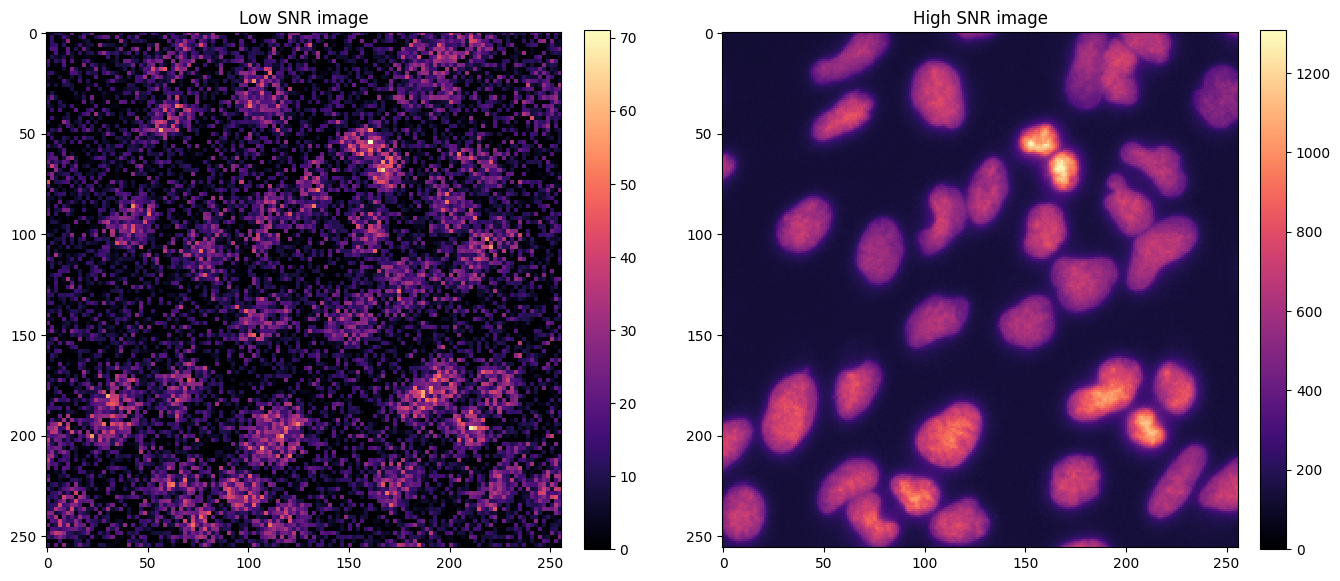

In [ ]:
# Plot images

pltPair(img_lowSNR, img_highSNR, 'Low SNR image', 'High SNR image', 'magma', 'magma', [0,71,0,1307], 16)

Max Intensity low SNR:  0
Min Intensity low SNR:  255
Max Intensity high SNR:  0
Min Intensity high SNR:  255


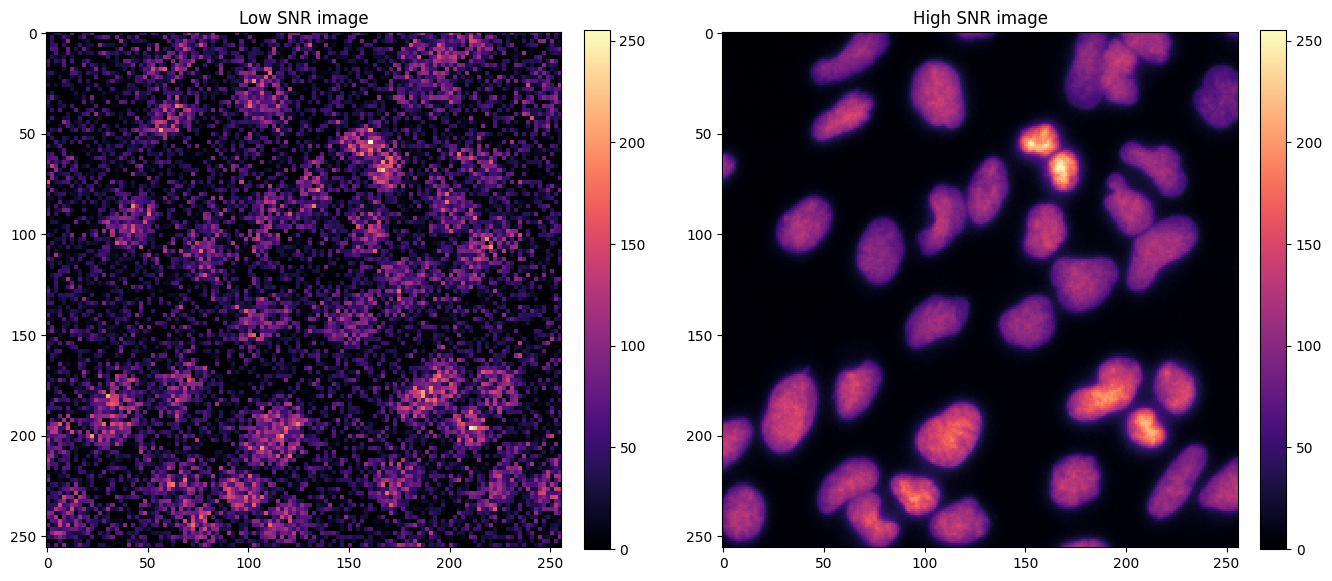

In [ ]:
img_lowSNR = rescale_intensity(img_lowSNR, 0, 255)
img_highSNR = rescale_intensity(img_highSNR, 0, 255)

print('Max Intensity low SNR: ', np.amin(img_lowSNR))
print('Min Intensity low SNR: ', np.amax(img_lowSNR))
print('Max Intensity high SNR: ', np.amin(img_highSNR))
print('Min Intensity high SNR: ', np.amax(img_highSNR))


pltPair(img_lowSNR, img_highSNR, 'Low SNR image', 'High SNR image', 'magma', 'magma', [0,255,0,255], 16)

## 4. Image Denoising using classic image processing methods


### Image Filtering

- Removing noise and preserving the structures of interest.

- Genereal noised reduction (smoothing) using a `Gaussian filter`

- Gaussian Smoothing : Gaussian kernel is determined by the standard deviation ($\sigma$) of the Gaussian distribution
- $\sigma$ : large enough to blur out noise but small enough to keep structures of interest

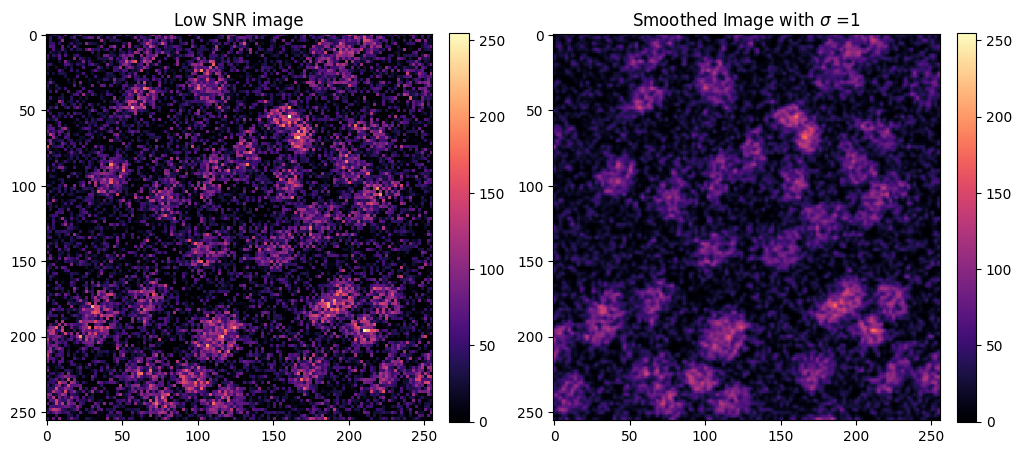

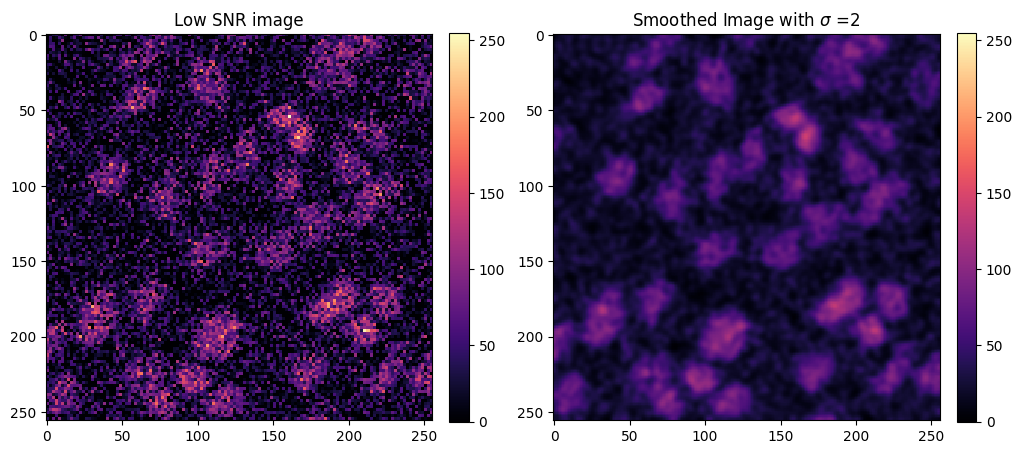

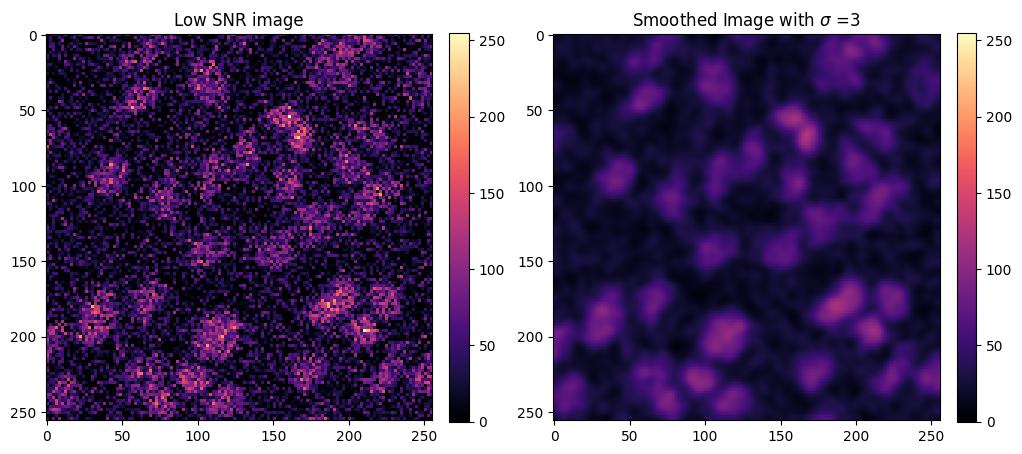

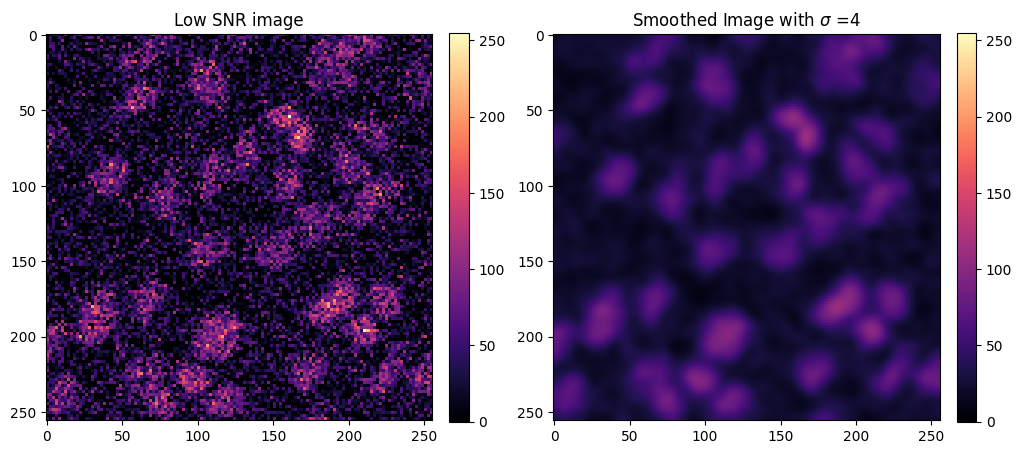

In [ ]:
# Test for several values for the smoothing factor sigma
# note: range(start_value, end_value, step)
# Use the Gaussian filter function 'ndi.filters.gaussian_filter' from the 'scipy.ndimage'

for sigma in range(1, 5, 1):
    img_smooth_test = gaussian_filter(img_lowSNR, sigma)
    txt = "$\sigma$ =" + str(sigma)
    pltPair(img_lowSNR, img_smooth_test, 'Low SNR image', 'Smoothed Image with '+"$\sigma$ =" + str(sigma), 'magma', 'magma', [0,255,0,255], 12)


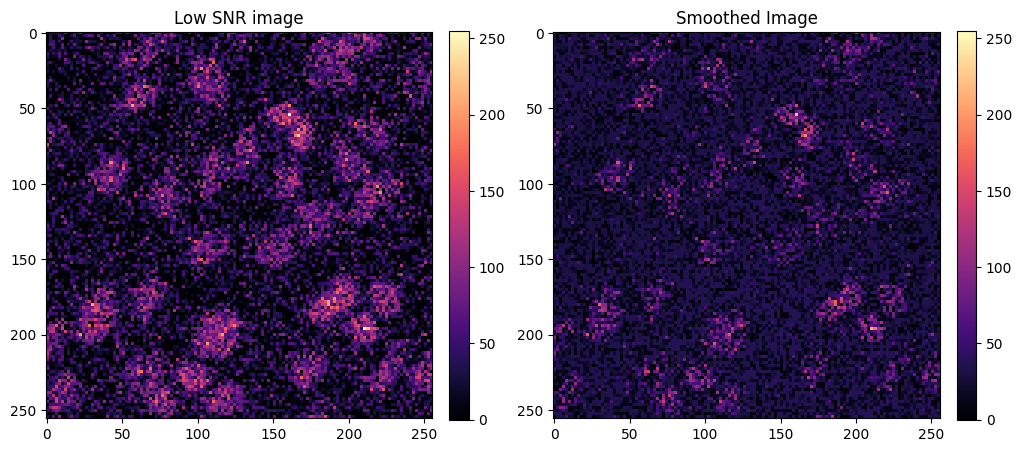

In [ ]:
# Perform FFT
f = np.fft.fft2(img_lowSNR)
fshift = np.fft.fftshift(f)

# Create a mask with a central square of 1s
rows, cols = img_lowSNR.shape
crow, ccol = rows//2 , cols//2
mask = np.ones((rows, cols), np.uint8)
r = 1  # Radius of the central square
mask[crow-r:crow+r, ccol-r:ccol+r] = 0

# Apply mask and inverse FFT
fshift = fshift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

pltPair(img_lowSNR, img_back, 'Low SNR image', 'Smoothed Image', 'magma', 'magma', [0,255,0,255], 12)



## 4. Image Denoising using autoencoders

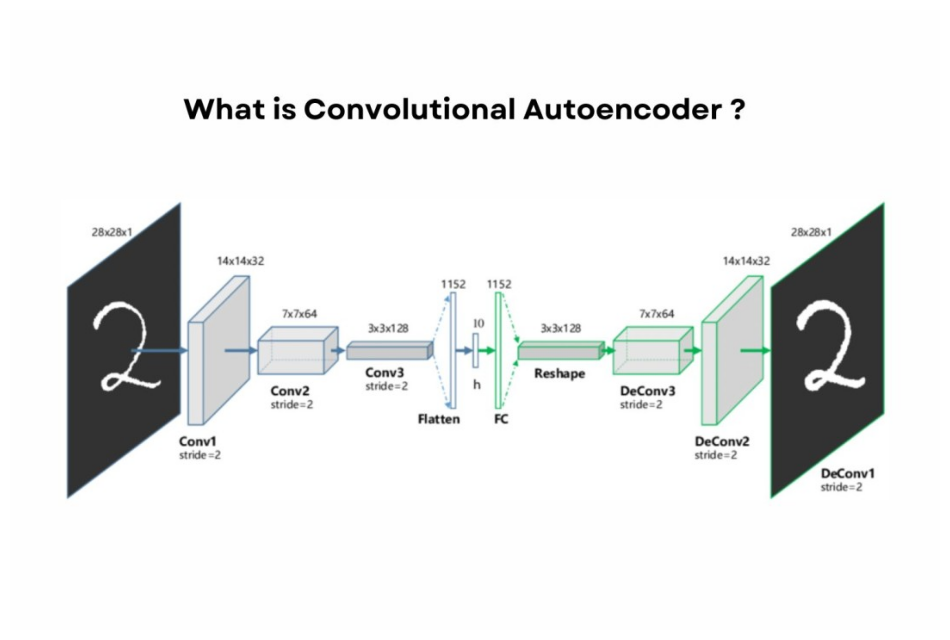

In [ ]:
import requests
from io import BytesIO

# URL of the image you want to import
image_url = 'https://media.licdn.com/dms/image/D5612AQGrNmowFZs7Rg/article-cover_image-shrink_720_1280/0/1709241133531?e=1727308800&v=beta&t=0Zhj9NBqciRTkM9kyHrbzZiHtBDPtPP27rNejlZNGY4'

# Fetch the image from the internet
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Plot the image using matplotlib
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


### Load images

In [ ]:
# Custom dataset for loading images
batch_size = 128

class NoisyImageDataset(Dataset):
    def __init__(self, noisy_dir, clean_dir, transform=None):
        self.noisy_dir = noisy_dir
        self.clean_dir = clean_dir
        self.transform = transform
        self.noisy_images = os.listdir(noisy_dir)
        self.clean_images = os.listdir(clean_dir)

    def __len__(self):
        return len(self.noisy_images)

    def __getitem__(self, idx):
        noisy_img_path = os.path.join(self.noisy_dir, self.noisy_images[idx])
        clean_img_path = os.path.join(self.clean_dir, self.clean_images[idx])
        noisy_image = io.imread(noisy_img_path).astype(np.float32)
        clean_image = io.imread(clean_img_path).astype(np.float32)

       # Normalize to [0, 1] using min and max pixel values of each image
        noisy_image = (noisy_image - noisy_image.min()) / (noisy_image.max() - noisy_image.min())
        clean_image = (clean_image - clean_image.min()) / (clean_image.max() - clean_image.min())


        noisy_image /= noisy_image.max()
        clean_image /= clean_image.max()

        if self.transform:
            noisy_image = self.transform(noisy_image)
            clean_image = self.transform(clean_image)

        return noisy_image, clean_image

# Transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load datasets
full_dataset  = NoisyImageDataset(noisy_dir='/content/data/train/low/', clean_dir='/content/data/train/low/', transform=transform)
test_dataset  = NoisyImageDataset(noisy_dir='/content/data/test/low/',  clean_dir='/content/data/test/GT',    transform=transform)


# Split the full dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, worker_init_fn=worker_init_fn)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, worker_init_fn=worker_init_fn)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, worker_init_fn=worker_init_fn)

# Print the number of elements and batches in each data loader
print(f'Number of elements in train_loader: {len(train_loader.dataset)}')
print(f'Number of batches in train_loader: {len(train_loader)}')

print(f'Number of elements in val_loader: {len(val_loader.dataset)}')
print(f'Number of batches in val_loader: {len(val_loader)}')

print(f'Number of elements in test_loader: {len(test_loader.dataset)}')
print(f'Number of batches in test_loader: {len(test_loader)}')

Number of elements in train_loader: 1965
Number of batches in train_loader: 16
Number of elements in val_loader: 492
Number of batches in val_loader: 4
Number of elements in test_loader: 615
Number of batches in test_loader: 5


## Plot some images as examples

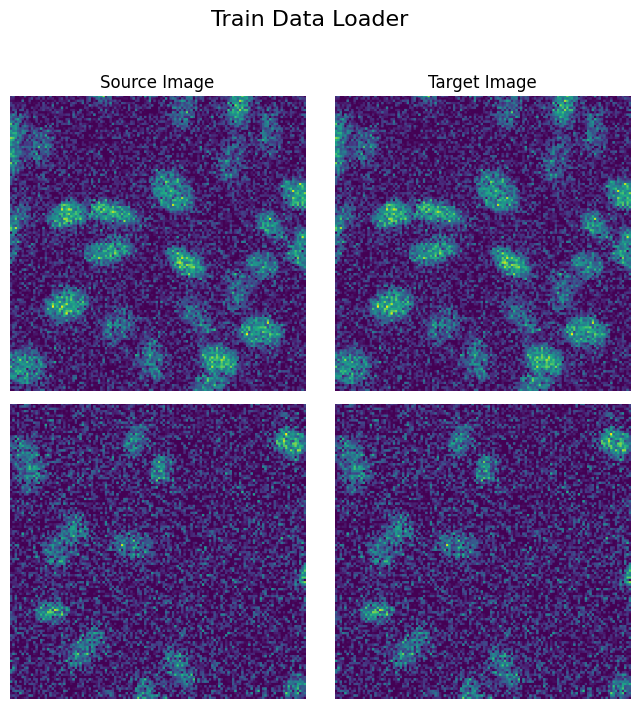

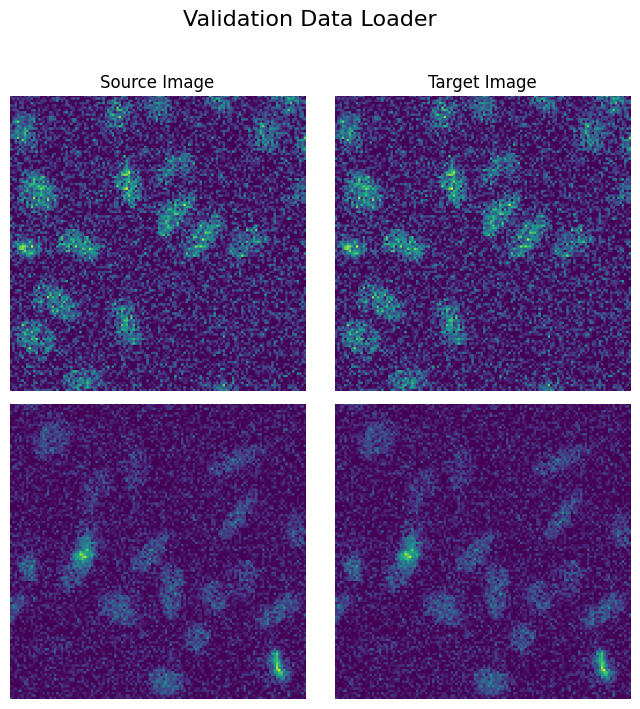

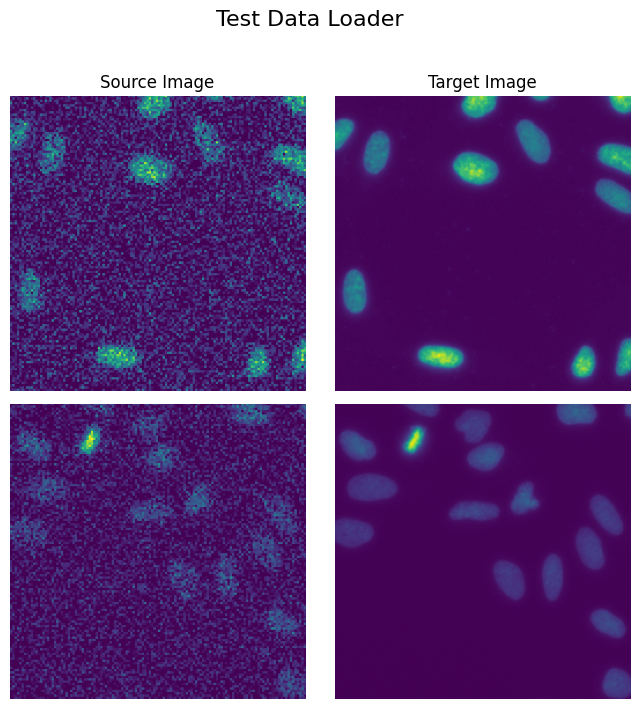

In [ ]:
# Function to plot image pairs
def plot_image_pairs(data_loader, title, Nimages):
    data_iter = iter(data_loader)
    fig, axes = plt.subplots(nrows=Nimages, ncols=2, figsize=(8, 4*Nimages))
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(wspace=0.1, hspace=0) # Adjust the spacing between subplots
    noisy_images, clean_images = next(data_iter) # get N pairs of images, N = batchc size

    # Plot fewer image pairs than the batch size
    if Nimages > noisy_images.shape[0]:
        Nimages = noisy_images.shape[0]

    for i in range(Nimages):
      axes[i, 0].imshow(np.squeeze(noisy_images[i]))
      #print(np.amax(noisy_images[i,:,:,:]))
      #print(np.amin(noisy_images[i,:,:,:]))
      axes[i, 0].axis('off')
      axes[i, 1].imshow(np.squeeze(clean_images[i]))
      axes[i, 1].axis('off')
      if i == 0:
          axes[i, 0].set_title('Source Image', fontsize=12)
          axes[i, 1].set_title('Target Image', fontsize=12)
    plt.show()

# Plotting train and test image pairs
plot_image_pairs(train_loader, "Train Data Loader", 2)
plot_image_pairs(val_loader, "Validation Data Loader", 2)
plot_image_pairs(test_loader, "Test Data Loader", 2)

## Define Autoencoder model

In [ ]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        # Define the encoder part of the autoencoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=2, padding=1),  # First convolutional layer
            nn.BatchNorm2d(32),                        # Batch normalization
            nn.ReLU(),                                 # ReLU activation
            nn.Conv2d(32, 64, 3, stride=2, padding=1), # Second convolutional layer
            nn.BatchNorm2d(64),                        # Batch normalization
            nn.ReLU(),                                 # ReLU activation
            nn.Conv2d(64, 128, 3, stride=2, padding=1),# Third convolutional layer
            nn.BatchNorm2d(128),                       # Batch normalization
            nn.ReLU(),                                 # ReLU activation
            nn.Conv2d(128, 256, 3, stride=2, padding=1),# Fourth convolutional layer
            nn.BatchNorm2d(256),                       # Batch normalization
            nn.ReLU()                                  # ReLU activation
        )
        # Define the decoder part of the autoencoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1), # First transposed convolutional layer
            nn.BatchNorm2d(128),                                                     # Batch normalization
            nn.ReLU(),                                                               # ReLU activation
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),   # Second transposed convolutional layer
            nn.BatchNorm2d(64),                                                      # Batch normalization
            nn.ReLU(),                                                               # ReLU activation
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),    # Third transposed convolutional layer
            nn.BatchNorm2d(32),                                                      # Batch normalization
            nn.ReLU(),                                                               # ReLU activation
            nn.ConvTranspose2d(32, 1, 3, stride=2, padding=1, output_padding=1),     # Fourth transposed convolutional layer
            nn.Sigmoid()                                                             # Sigmoid activation
        )

    def forward(self, x):
        # Add noise to the input
        noise = torch.randn_like(x) * 0.1  # Gaussian noise
        x_noisy = x + noise
        x_noisy = torch.clamp(x_noisy, 0., 1.)  # Ensure the values are still in the range [0, 1]

        # Encode and decode
        encoded = self.encoder(x_noisy)
        decoded = self.decoder(encoded)
        return decoded


# Initialize model
model = DenoisingAutoencoder().cuda()
summary(model, (1, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             320
       BatchNorm2d-2         [-1, 32, 128, 128]              64
              ReLU-3         [-1, 32, 128, 128]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
       BatchNorm2d-5           [-1, 64, 64, 64]             128
              ReLU-6           [-1, 64, 64, 64]               0
            Conv2d-7          [-1, 128, 32, 32]          73,856
       BatchNorm2d-8          [-1, 128, 32, 32]             256
              ReLU-9          [-1, 128, 32, 32]               0
           Conv2d-10          [-1, 256, 16, 16]         295,168
      BatchNorm2d-11          [-1, 256, 16, 16]             512
             ReLU-12          [-1, 256, 16, 16]               0
  ConvTranspose2d-13          [-1, 128, 32, 32]         295,040
      BatchNorm2d-14          [-1, 128,

## Train Model

Epoch [1/100], Train Loss: 0.0483, Val Loss: 0.0177, Time: 10.12 seconds
Epoch [2/100], Train Loss: 0.0143, Val Loss: 0.0187, Time: 9.42 seconds
Epoch [3/100], Train Loss: 0.0123, Val Loss: 0.0137, Time: 9.42 seconds
Epoch [4/100], Train Loss: 0.0117, Val Loss: 0.0117, Time: 9.48 seconds
Epoch [5/100], Train Loss: 0.0114, Val Loss: 0.0113, Time: 9.35 seconds
Epoch [6/100], Train Loss: 0.0110, Val Loss: 0.0115, Time: 9.56 seconds
Epoch [7/100], Train Loss: 0.0109, Val Loss: 0.0112, Time: 9.62 seconds
Epoch [8/100], Train Loss: 0.0106, Val Loss: 0.0109, Time: 9.69 seconds
Epoch [9/100], Train Loss: 0.0105, Val Loss: 0.0106, Time: 9.36 seconds
Epoch [10/100], Train Loss: 0.0104, Val Loss: 0.0105, Time: 9.95 seconds
Epoch [11/100], Train Loss: 0.0103, Val Loss: 0.0104, Time: 9.84 seconds
Epoch [12/100], Train Loss: 0.0102, Val Loss: 0.0103, Time: 10.28 seconds
Epoch [13/100], Train Loss: 0.0101, Val Loss: 0.0103, Time: 9.94 seconds
Epoch [14/100], Train Loss: 0.0100, Val Loss: 0.0102, Time

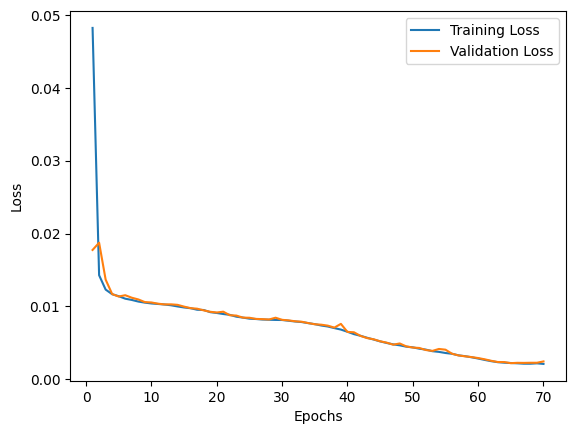

In [ ]:
# Training parameters
num_epochs = 100
learning_rate = 0.005
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
patience = 5  # Early stopping patience


# Store losses
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience_counter = 0

# Training loop
for epoch in range(num_epochs):
    start_time = time.time()  # Start time for epoch
    model.train()
    train_loss = 0.0
    for data in train_loader:
        noisy_imgs, _ = data
        noisy_imgs = noisy_imgs.cuda()
        outputs = model(noisy_imgs)
        loss = criterion(outputs, noisy_imgs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            noisy_imgs, _ = data
            noisy_imgs = noisy_imgs.cuda()
            outputs = model(noisy_imgs)
            loss = criterion(outputs, noisy_imgs)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    epoch_time = time.time() - start_time  # Calculate epoch duration
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Time: {epoch_time:.2f} seconds')

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered")
        break

# Plotting the training and validation loss
plt.figure()
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Visualize the results

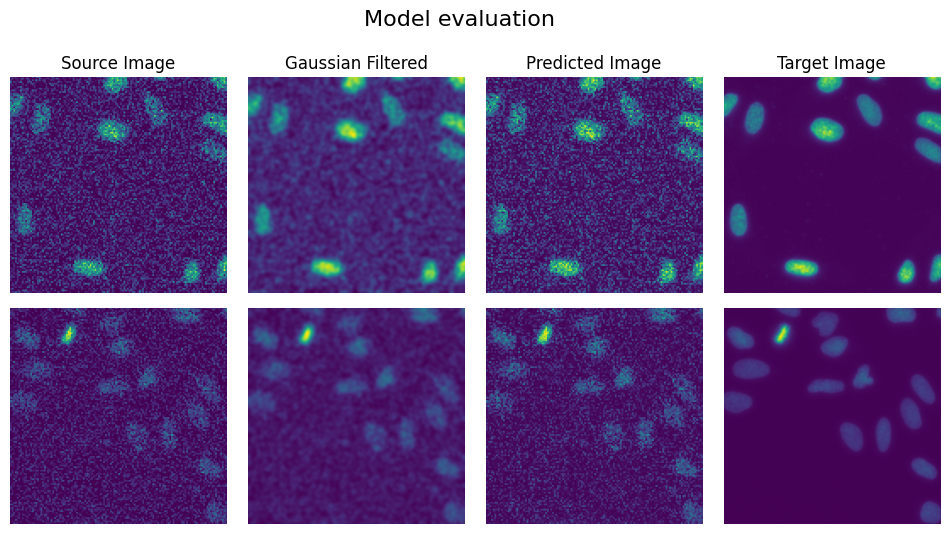

In [ ]:
# Model evaluation
NimagesToShow = 2
fig, axes = plt.subplots(nrows=NimagesToShow, ncols=4, figsize=(12, 3*NimagesToShow))
fig.suptitle("Model evaluation", fontsize=16)
fig.subplots_adjust(wspace=0.1, hspace=0) # Adjust the spacing between subplots

model.eval()
with torch.no_grad():
    data_iter = iter(test_loader)
    noisy_images, clean_images = next(data_iter)  # get N pairs of images, N = batch size
    noisy_images = noisy_images.cuda()
    outputs = model(noisy_images)

    noisy_images = noisy_images.cpu()  # Move back to CPU
    outputs = outputs.cpu()            # Move outputs to CPU


    # Plot fewer image pairs than the batch size
    if NimagesToShow > noisy_images.shape[0]:
        NimagesToShow = noisy_images.shape[0]

    for i in range(NimagesToShow):
        axes[i, 0].imshow(np.squeeze(noisy_images[i]))
        axes[i, 0].axis('off')
        axes[i, 1].imshow(gaussian_filter(np.squeeze(noisy_images[i]), sigma=2))
        axes[i, 1].axis('off')
        axes[i, 2].imshow(np.squeeze(outputs[i]))
        axes[i, 2].axis('off')
        axes[i, 3].imshow(np.squeeze(clean_images[i]))
        axes[i, 3].axis('off')
        if i == 0:
            axes[i, 0].set_title('Source Image', fontsize=12)
            axes[i, 1].set_title('Gaussian Filtered', fontsize=12)
            axes[i, 2].set_title('Predicted Image', fontsize=12)
            axes[i, 3].set_title('Target Image', fontsize=12)

plt.show()



## Quantify results

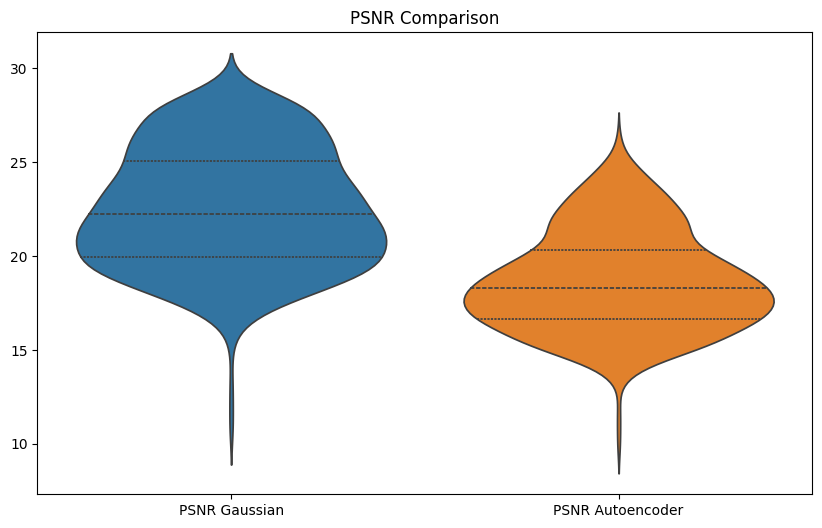

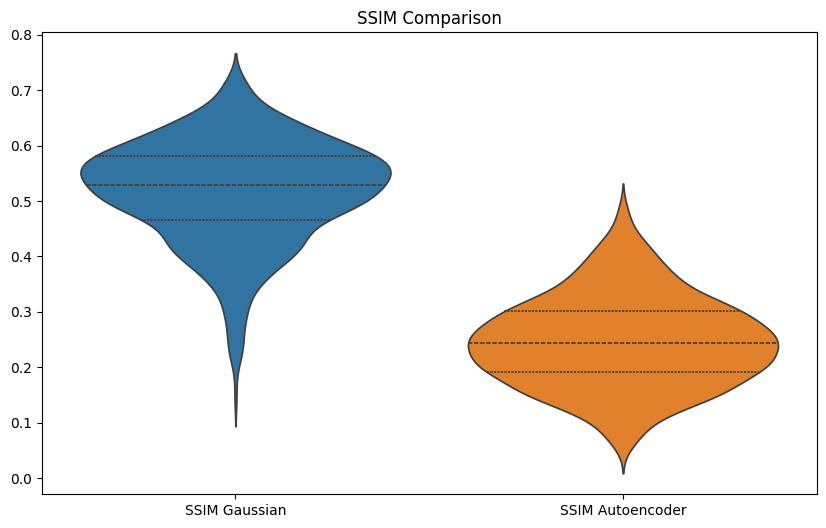

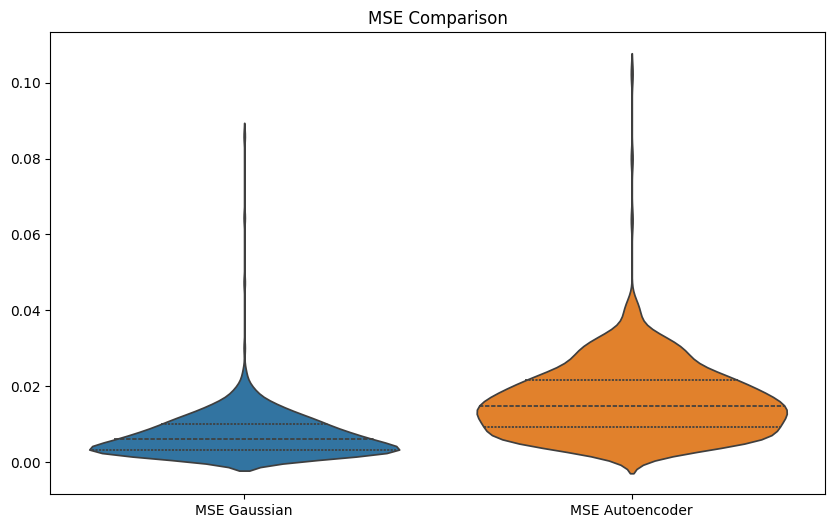

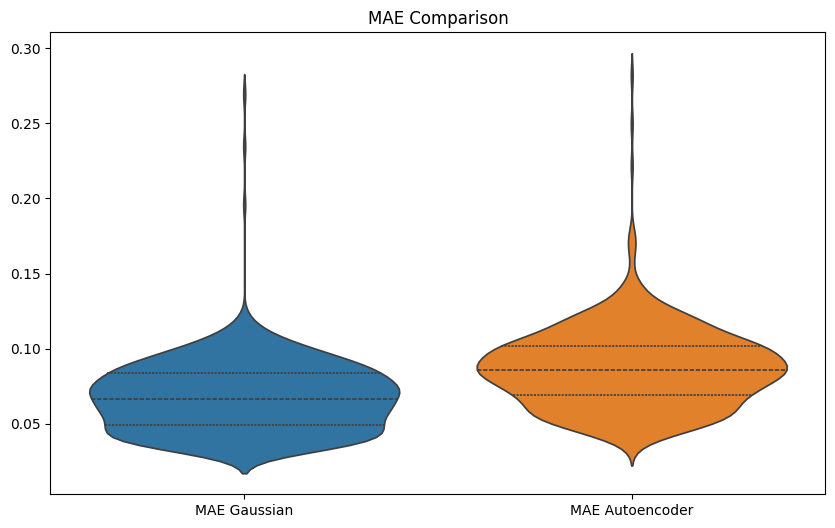

In [ ]:
# Metrics
psnr_list, ssim_list, mse_list, mae_list = [], [], [], []
psnr_gaussian, ssim_gaussian, mse_gaussian, mae_gaussian = [], [], [], []

def calculate_metrics(clean, denoised):
    imse = mse(clean, denoised)
    psnr = 10 * log10(1 / imse)
    s = ssim(clean, denoised)
    imae = mae(clean, denoised)
    return psnr, s, imse, imae

with torch.no_grad():
    for i, data in enumerate(test_loader):
        noisy_imgs, clean_imgs = data
        noisy_imgs, clean_imgs = noisy_imgs.cuda(), clean_imgs.cuda()
        outputs = model(noisy_imgs)

        for j in range(len(outputs)):
            noisy_img = noisy_imgs[j].cpu().numpy().squeeze()
            clean = clean_imgs[j].cpu().numpy().squeeze()
            denoised = outputs[j].cpu().numpy().squeeze()
            gaussian_img = gaussian_filter(noisy_img, sigma=2)

            psnr, s, imse, imae = calculate_metrics(clean, denoised)
            psnr_list.append(psnr)
            ssim_list.append(s)
            mse_list.append(imse)
            mae_list.append(imae)

            psnr_g, s_g, imse_g, imae_g = calculate_metrics(clean, gaussian_img)
            psnr_gaussian.append(psnr_g)
            ssim_gaussian.append(s_g)
            mse_gaussian.append(imse_g)
            mae_gaussian.append(imae_g)

# Plotting results
metrics_df = pd.DataFrame({
    'PSNR Autoencoder': psnr_list,
    'PSNR Gaussian': psnr_gaussian,
    'SSIM Autoencoder': ssim_list,
    'SSIM Gaussian': ssim_gaussian,
    'MSE Autoencoder': mse_list,
    'MSE Gaussian': mse_gaussian,
    'MAE Autoencoder': mae_list,
    'MAE Gaussian': mae_gaussian,
})

# Plot PSNR
plt.figure(figsize=(10, 6))
sns.violinplot(data=metrics_df[[ 'PSNR Gaussian','PSNR Autoencoder']], inner="quartile")
plt.title('PSNR Comparison')
plt.show()

# Plot SSIM
plt.figure(figsize=(10, 6))
sns.violinplot(data=metrics_df[['SSIM Gaussian', 'SSIM Autoencoder']], inner="quartile")
plt.title('SSIM Comparison')
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))
sns.violinplot(data=metrics_df[['MSE Gaussian','MSE Autoencoder']], inner="quartile")
plt.title('MSE Comparison')
plt.show()

# Plot MAE
plt.figure(figsize=(10, 6))
sns.violinplot(data=metrics_df[['MAE Gaussian', 'MAE Autoencoder']], inner="quartile")
plt.title('MAE Comparison')
plt.show()




## To-Do: small project

In [ ]:
#3D data : 'http://csbdeep.bioimagecomputing.com/example_data/tribolium.zip'

#Larger Models


class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()  # Initialize the parent class nn.Module
        # Define the encoder part of the autoencoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=2, padding=1),     # First convolutional layer: 1 input channel, 32 output channels, kernel size 3x3, stride 2, padding 1
            nn.BatchNorm2d(32),                           # Batch normalization to improve training speed and stability
            nn.ReLU(),                                    # ReLU activation function
            nn.Conv2d(32, 64, 3, stride=2, padding=1),    # Second convolutional layer: 32 input channels, 64 output channels, kernel size 3x3, stride 2, padding 1
            nn.BatchNorm2d(64),                           # Batch normalization for 64 channels
            nn.ReLU(),                                    # ReLU activation function
            nn.Conv2d(64, 128, 3, stride=2, padding=1),   # Third convolutional layer: 64 input channels, 128 output channels, kernel size 3x3, stride 2, padding 1
            nn.BatchNorm2d(128),                          # Batch normalization for 128 channels
            nn.ReLU(),                                    # ReLU activation function
            nn.Conv2d(128, 256, 3, stride=2, padding=1),  # Fourth convolutional layer: 128 input channels, 256 output channels, kernel size 3x3, stride 2, padding 1
            nn.BatchNorm2d(256),                          # Batch normalization for 256 channels
            nn.ReLU(),                                    # ReLU activation function
            nn.Conv2d(256, 512, 3)                        # Fifth convolutional layer: 256 input channels, 512 output channels, kernel size 3x3, no stride or padding
        )
        # Define the decoder part of the autoencoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, 3),                              # First transposed convolutional layer: 512 input channels, 256 output channels, kernel size 3x3
            nn.BatchNorm2d(256),                                          # Batch normalization for 256 channels
            nn.ReLU(),                                                    # ReLU activation function
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1),  # Second transposed convolutional layer: 256 input channels, 128 output channels, kernel size 3x3, stride 2, padding 1, output padding 1
            nn.BatchNorm2d(128),                                          # Batch normalization for 128 channels
            nn.ReLU(),                                                    # ReLU activation function
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),   # Third transposed convolutional layer: 128 input channels, 64 output channels, kernel size 3x3, stride 2, padding 1, output padding 1
            nn.BatchNorm2d(64),                                           # Batch normalization for 64 channels
            nn.ReLU(),                                                    # ReLU activation function
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),    # Fourth transposed convolutional layer: 64 input channels, 32 output channels, kernel size 3x3, stride 2, padding 1, output padding 1
            nn.BatchNorm2d(32),                                           # Batch normalization for 32 channels
            nn.ReLU(),                                                    # ReLU activation function
            nn.ConvTranspose2d(32, 1, 3, stride=2, padding=1, output_padding=1),     # Fifth transposed convolutional layer: 32 input channels, 1 output channel, kernel size 3x3, stride 2, padding 1, output padding 1
            nn.Sigmoid()                                                  # Sigmoid activation function for the final layer to normalize the output between 0 and 1
        )

    def forward(self, x):  # Define the forward pass of the autoencoder
        x = self.encoder(x)  # Pass the input through the encoder
        x = self.decoder(x)  # Pass the encoded input through the decoder
        return x             # Return the reconstructed output